In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/archive/Sunway_Runs/HR_HF_TNST/B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
plotvar2 = data.variables['SSH'][:,200:319,700:1000]

In [3]:
plotvar2.shape

(3012, 119, 300)

In [4]:
result = np.nanmean(plotvar2,axis=1)
result = np.nanmean(result,axis=1)

In [5]:
result.shape

(3012,)

In [6]:
ww1 = np.convolve(result, np.ones((60,))/60, mode='valid')

In [7]:
ww1.shape


(2953,)

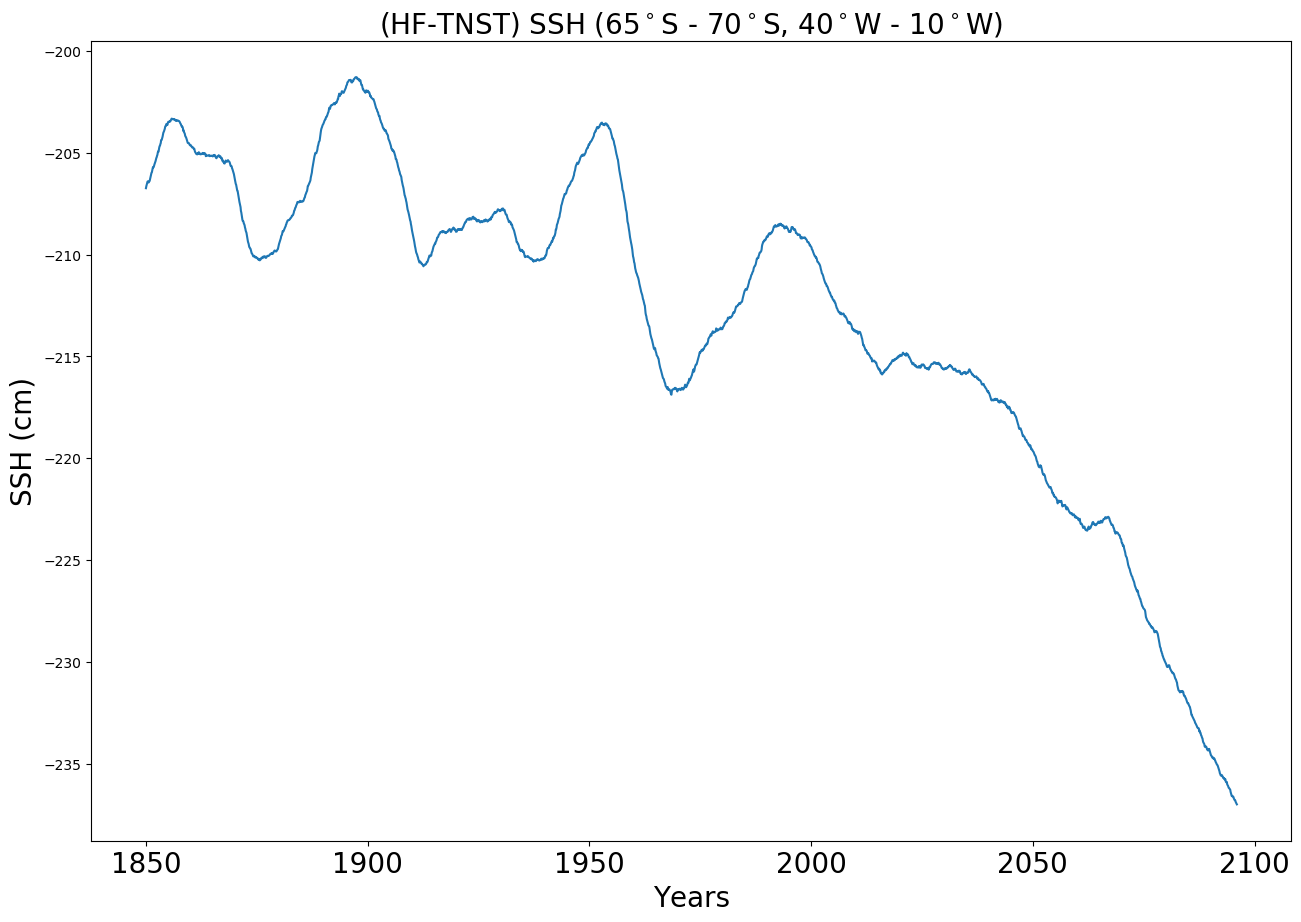

In [12]:
fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.plot(ww1)
#im = ax0.plot(final,'r*')
#plt.xticks(range(0,310,10), ['20','70','120', '170', '220', '270','320'],**my_font)
plt.xticks(range(0,3001,600), ['1850', '1900','1950', '2000','2050','2100'],**my_font)
#plt.yticks(range(-205,-183,3), ['-205', '-202', '-199', '-196', '-193','-190','-187','-184'],**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('SSH (cm)',**my_font)
ax0.set_title('(HF-TNST) SSH (65$^\circ$S - 70$^\circ$S, 40$^\circ$W - 10$^\circ$W)',**my_font)
plt.savefig("wed2.png")